In [43]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot


In [44]:
conn = sqlite3.connect("db/fifa_app.db")

players = pd.read_sql_query("SELECT * FROM Players", conn)
teams = pd.read_sql_query("SELECT * FROM Teams", conn)
stadiums = pd.read_sql_query("SELECT * FROM Stadiums", conn)

conn.close()

In [45]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Player_ID      217 non-null    int64 
 1   Name           217 non-null    object
 2   Date_of_birth  217 non-null    object
 3   Height_cm      217 non-null    int64 
 4   Position       217 non-null    object
 5   Market_value   217 non-null    int64 
 6   Better_foot    217 non-null    object
 7   Team_ID        217 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 13.7+ KB


In [46]:
players.head()

,Player_ID,Name,Date_of_birth,Height_cm,Position,Market_value,Better_foot,Team_ID
0,0,Wojciech Szczesny,1990-04-18,196,Goalkeeper,13000000,R,1
1,1,Kamil Grabara,1999-01-08,195,Goalkeeper,5000000,R,1
2,2,Lukasz Skorupski,1991-05-05,187,Goalkeeper,3000000,R,1
3,3,Jan Bednarek,1996-04-12,189,Centre-Back,18000000,R,1
4,4,Jakub Kiwior,2000-02-15,189,Centre-Back,8000000,L,1


In [47]:
players.columns

Index(['Player_ID', 'Name', 'Date_of_birth', 'Height_cm', 'Position',
       'Market_value', 'Better_foot', 'Team_ID'],
      dtype='object')

In [48]:
players.nlargest(15, ['Market_value'])

,Player_ID,Name,Date_of_birth,Height_cm,Position,Market_value,Better_foot,Team_ID
139,139,Pedri,2002-11-25,174,Central Midfield,100000000,R,5
167,167,Jamal Musiala,2003-02-26,184,Attacking Midfield,100000000,R,6
140,140,Gavi,2004-08-05,173,Central Midfield,90000000,R,5
137,137,Rodri,1996-06-22,191,Defensive Midfield,80000000,R,5
164,164,Joshua Kimmich,1995-02-08,177,Defensive Midfield,80000000,R,6
50,50,Lautaro Martinez,1997-08-22,174,Centre-Forward,75000000,R,0
168,168,Kai Havertz,1999-06-11,190,Attacking Midfield,70000000,L,6
171,171,Leroy Sane,1996-01-11,183,Left Winger,70000000,L,6
165,165,Leon Goretzka,1995-02-06,189,Central Midfield,65000000,R,6
172,172,Serge Gnabry,1995-07-14,176,Right Winger,65000000,R,6


In [49]:
players_top_value = players.nlargest(15, ['Market_value'])


plot_1 = go.Bar(
                x = players_top_value.Name,
                y = players_top_value.Market_value,
                marker = dict(color = '#a1435f',
                line=dict(color='rgb(0,0,0)',width=1.5)),
                text = players_top_value.Position)

data = [plot_1]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
fig.update_layout(yaxis_range=[25000000,110000000])
fig.update_layout(
    title="Top 15 players with the highest market value",
    xaxis_title="Players",
    yaxis_title="Market value",
    template = "plotly_white",

)
iplot(fig)

In [50]:
fig = px.bar(players_top_value, x="Name", y="Market_value", barmode="group", template='plotly_white', title="Top 15 players with the highest market value",
      text = players_top_value.Position)
fig.update_xaxes(title_text="Players")
fig.update_yaxes(title_text="Market value")
fig.update_traces(marker_color='#a1435f', marker_line_color='rgb(0,0,0)',
                  marker_line_width=1.5, opacity=0.95)
fig.show()

In [51]:
players_tallest = players.nlargest(15, ['Height_cm'])

trace1 = go.Bar(
                y = players_tallest.Name,
                x = players_tallest.Height_cm,
                marker = dict(color = '#63C085',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = players_tallest.Position,
                orientation='h')

data = [trace1]
layout = go.Layout(barmode = "group")
fig2 = go.Figure(data = data, layout = layout)
fig2.update_layout(xaxis_range=[185,200])
fig2.update_layout(
    title="Top 15 tallest players",
    xaxis_title="Height",
    yaxis_title="Players",
    template = "plotly_white"
)
iplot(fig2)

In [52]:
fig = px.bar(players_tallest, x="Height_cm", y="Name", barmode="group", template='plotly_white', title="Top 15 tallest players",
      text = players_top_value.Position)
fig.update_xaxes(title_text="Height", range = [185,200])
fig.update_yaxes(title_text="Players")
fig.update_traces(marker_color='#63C085', marker_line_color='rgb(0,0,0)',
                  marker_line_width=1.5, opacity=0.95)
fig.show()

In [53]:
teams

,Team_ID,Team_name,Coach,Captain,Group_letter,Wins,Draws,Losses,Goals_for,Goals_against,Points
0,0,Argentina,Lionel Scaloni,Lionel Messi,C,2,0,1,5,2,6
1,1,Poland,Czeslaw Michniewicz,Robert Lewandowski,C,1,1,1,2,2,4
2,2,Mexico,Gerardo Martino,Andres Guardado,C,1,1,1,2,3,4
3,3,Saudi Arabia,Herve Renard,Salman Al-Faraj,C,1,0,2,3,5,3
4,4,Japan,Hajime Moriyasu,Maya Yoshida,E,2,0,1,4,3,6
5,5,Spain,Luis de la Fuente,Sergio Busquets,E,1,1,1,9,3,4
6,6,Germany,Hansi Flick,Manuel Neuer,E,1,1,1,6,5,4
7,7,Costa Rica,Luis Fernando Suarez,Bryan Ruiz,E,1,0,2,3,11,3


In [54]:
teams

,Team_ID,Team_name,Coach,Captain,Group_letter,Wins,Draws,Losses,Goals_for,Goals_against,Points
0,0,Argentina,Lionel Scaloni,Lionel Messi,C,2,0,1,5,2,6
1,1,Poland,Czeslaw Michniewicz,Robert Lewandowski,C,1,1,1,2,2,4
2,2,Mexico,Gerardo Martino,Andres Guardado,C,1,1,1,2,3,4
3,3,Saudi Arabia,Herve Renard,Salman Al-Faraj,C,1,0,2,3,5,3
4,4,Japan,Hajime Moriyasu,Maya Yoshida,E,2,0,1,4,3,6
5,5,Spain,Luis de la Fuente,Sergio Busquets,E,1,1,1,9,3,4
6,6,Germany,Hansi Flick,Manuel Neuer,E,1,1,1,6,5,4
7,7,Costa Rica,Luis Fernando Suarez,Bryan Ruiz,E,1,0,2,3,11,3


In [55]:
team_names = teams['Team_name']

In [56]:
teams_grpd_height = players[['Height_cm', 'Market_value' ,'Team_ID']]
teams_grpd_height = players.groupby(['Team_ID']).mean()

In [57]:
teams_grpd_height

,Player_ID,Height_cm,Market_value
Team_ID,,,
0,38.500000,178.384615,2.731538e+07
1,12.500000,184.269231,9.907692e+06
2,64.500000,179.538462,6.830769e+06
3,132.333333,177.027778,8.513889e+05
4,113.500000,180.076923,6.415385e+06
5,141.961538,181.230769,3.388462e+07
6,164.500000,185.153846,3.425000e+07
7,190.000000,181.440000,7.440000e+05


In [58]:
teams_grpd_height['Team_Name'] = team_names

In [59]:
teams_grpd_height

,Player_ID,Height_cm,Market_value,Team_Name
Team_ID,,,,
0,38.500000,178.384615,2.731538e+07,Argentina
1,12.500000,184.269231,9.907692e+06,Poland
2,64.500000,179.538462,6.830769e+06,Mexico
3,132.333333,177.027778,8.513889e+05,Saudi Arabia
4,113.500000,180.076923,6.415385e+06,Japan
5,141.961538,181.230769,3.388462e+07,Spain
6,164.500000,185.153846,3.425000e+07,Germany
7,190.000000,181.440000,7.440000e+05,Costa Rica


In [60]:
teams_grpd_height.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player_ID     8 non-null      float64
 1   Height_cm     8 non-null      float64
 2   Market_value  8 non-null      float64
 3   Team_Name     8 non-null      object 
dtypes: float64(3), object(1)
memory usage: 320.0+ bytes


Text(0.5, 1.0, 'Average players height by each team (country)')

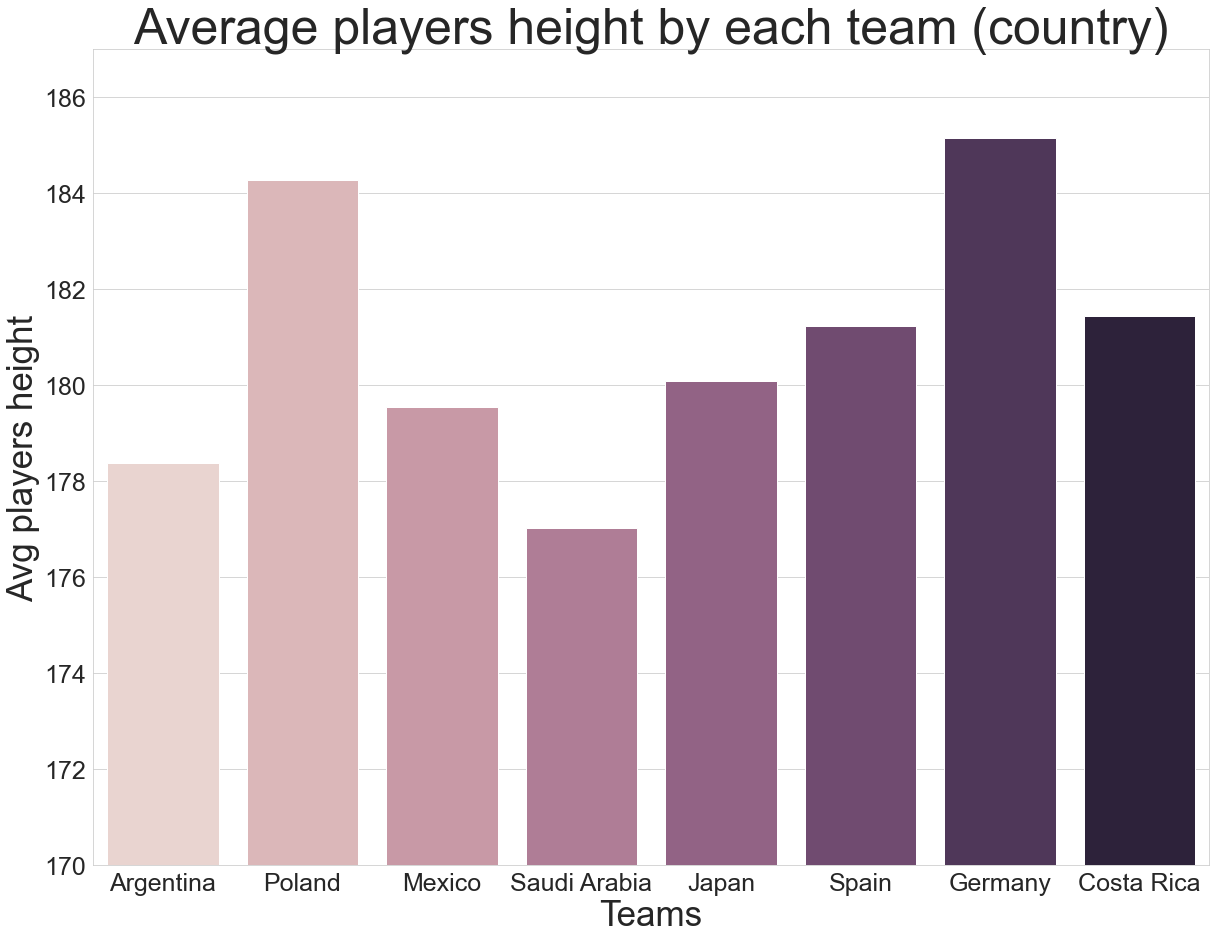

In [84]:
plt.figure(figsize=(20,15))
sns.set_style("whitegrid")
ax= sns.barplot(x=teams_grpd_height['Team_Name'], y=teams_grpd_height['Height_cm'], palette = sns.cubehelix_palette(len(teams_grpd_height['Team_Name'])))
plt.ylim(170, 187)
plt.xlabel('Teams', fontsize=35)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.ylabel('Avg players height', fontsize=35)
plt.title('Average players height by each team (country)', fontsize=50)


In [62]:
teams_grpd_value = players[['Market_value' ,'Team_ID']]

In [63]:
teams_grpd_value = players.groupby(['Team_ID']).sum()

In [64]:
teams_grpd_value['Team_Name'] = team_names

In [65]:
teams_grpd_value

,Player_ID,Height_cm,Market_value,Team_Name
Team_ID,,,,
0,1001,4638,710200000,Argentina
1,325,4791,257600000,Poland
2,1677,4668,177600000,Mexico
3,4764,6373,30650000,Saudi Arabia
4,2951,4682,166800000,Japan
5,3691,4712,881000000,Spain
6,4277,4814,890500000,Germany
7,4750,4536,18600000,Costa Rica


In [66]:
import plotly.express as px

print(px.colors.qualitative.Pastel)

['rgb(102, 197, 204)', 'rgb(246, 207, 113)', 'rgb(248, 156, 116)', 'rgb(220, 176, 242)', 'rgb(135, 197, 95)', 'rgb(158, 185, 243)', 'rgb(254, 136, 177)', 'rgb(201, 219, 116)', 'rgb(139, 224, 164)', 'rgb(180, 151, 231)', 'rgb(179, 179, 179)']


In [67]:
teams_grpd_value = teams_grpd_value.sort_values(by=['Market_value'], ascending=True)

In [68]:
teams_grpd_value

,Player_ID,Height_cm,Market_value,Team_Name
Team_ID,,,,
7,4750,4536,18600000,Costa Rica
3,4764,6373,30650000,Saudi Arabia
4,2951,4682,166800000,Japan
2,1677,4668,177600000,Mexico
1,325,4791,257600000,Poland
0,1001,4638,710200000,Argentina
5,3691,4712,881000000,Spain
6,4277,4814,890500000,Germany


Text(0.5, 1.0, 'Market value of teams (countries)')

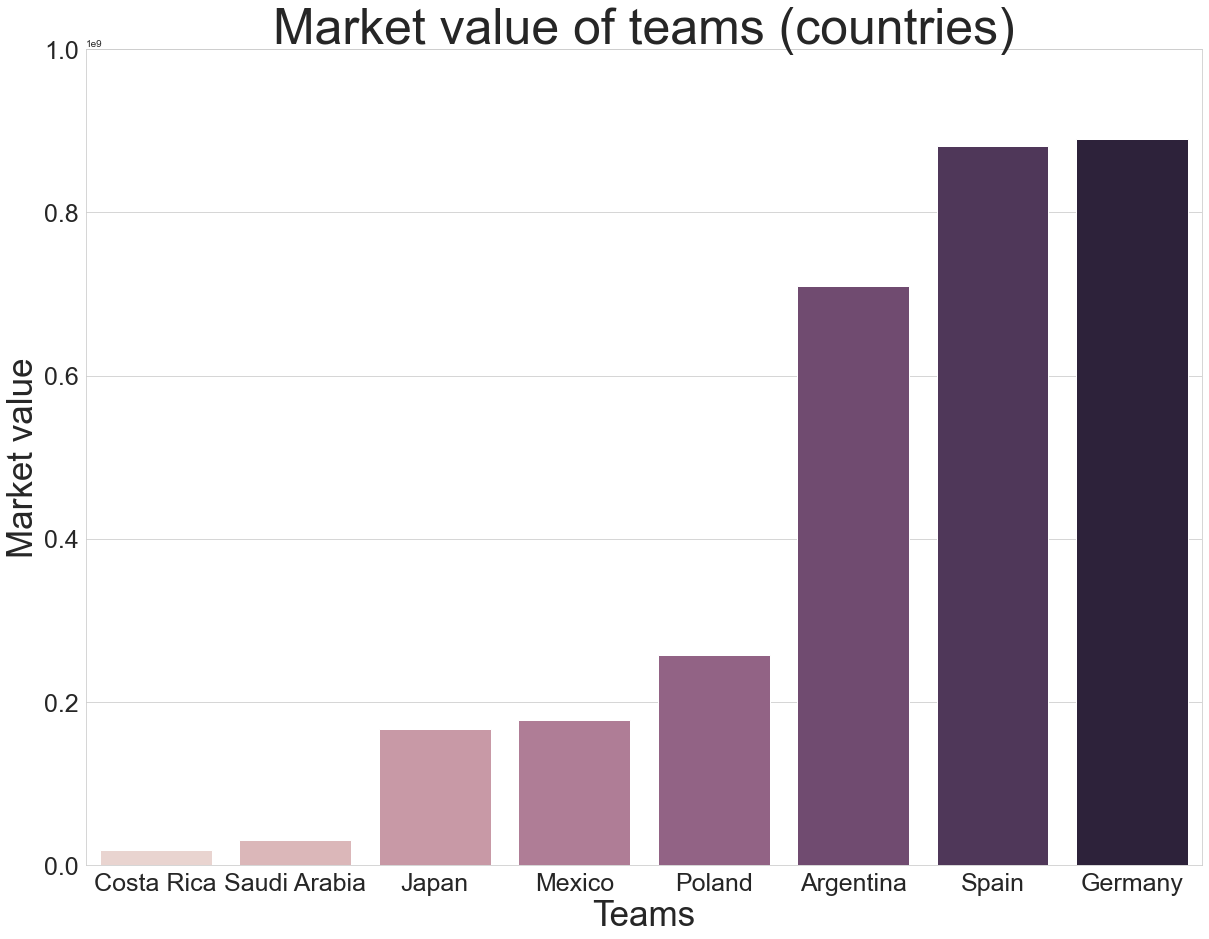

In [89]:
plt.figure(figsize=(20,15))
sns.set_style("whitegrid")
ax= sns.barplot(x=teams_grpd_value['Team_Name'], y=teams_grpd_value['Market_value'], palette = sns.cubehelix_palette(len(teams_grpd_value['Team_Name'])))
plt.ylim(0, 1000000000)
plt.xlabel('Teams', fontsize=35)
plt.ylabel('Market value', fontsize=35)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.title('Market value of teams (countries)', fontsize=50)

In [70]:
trace1 = go.Bar(
                x = teams_grpd_value.Market_value,
                y = teams_grpd_value.Team_Name,
                marker = dict(color = ['rgb(102, 197, 204)', 'rgb(246, 207, 113)', 'rgb(248, 156, 116)', 'rgb(220, 176, 242)', 'rgb(135, 197, 95)', 'rgb(158, 185, 243)', 'rgb(254, 136, 177)', 'rgb(201, 219, 116)'],
                line=dict(color='rgb(0,0,0)',width=1.5)),
                text = teams.Coach,
                orientation='h')

data = [trace1]
layout = go.Layout(barmode = "group")
fig3 = go.Figure(data = data, layout = layout)
fig3.update_layout(
    title="Market value of teams (countries)",
    xaxis_title="Market value",
    yaxis_title="Teams",
    template = "plotly_white"
)
iplot(fig3)

In [71]:
fig = px.bar(teams_grpd_value, x="Market_value", y="Team_Name", barmode="group", template='plotly_white', title="Market value of teams (countries)",
      text = teams.Coach)
fig.update_xaxes(title_text="Market value")
fig.update_yaxes(title_text="Teams")
fig.update_traces(marker_color=['rgb(102, 197, 204)', 'rgb(246, 207, 113)', 'rgb(248, 156, 116)', 'rgb(220, 176, 242)', 'rgb(135, 197, 95)', 'rgb(158, 185, 243)', 'rgb(254, 136, 177)', 'rgb(201, 219, 116)'], marker_line_color='rgb(0,0,0)',
                  marker_line_width=1.5, opacity=0.95)
fig.show()

In [72]:
teams

,Team_ID,Team_name,Coach,Captain,Group_letter,Wins,Draws,Losses,Goals_for,Goals_against,Points
0,0,Argentina,Lionel Scaloni,Lionel Messi,C,2,0,1,5,2,6
1,1,Poland,Czeslaw Michniewicz,Robert Lewandowski,C,1,1,1,2,2,4
2,2,Mexico,Gerardo Martino,Andres Guardado,C,1,1,1,2,3,4
3,3,Saudi Arabia,Herve Renard,Salman Al-Faraj,C,1,0,2,3,5,3
4,4,Japan,Hajime Moriyasu,Maya Yoshida,E,2,0,1,4,3,6
5,5,Spain,Luis de la Fuente,Sergio Busquets,E,1,1,1,9,3,4
6,6,Germany,Hansi Flick,Manuel Neuer,E,1,1,1,6,5,4
7,7,Costa Rica,Luis Fernando Suarez,Bryan Ruiz,E,1,0,2,3,11,3


In [73]:
group_c = teams[teams['Group_letter']=='C']

In [74]:
group_c

,Team_ID,Team_name,Coach,Captain,Group_letter,Wins,Draws,Losses,Goals_for,Goals_against,Points
0,0,Argentina,Lionel Scaloni,Lionel Messi,C,2,0,1,5,2,6
1,1,Poland,Czeslaw Michniewicz,Robert Lewandowski,C,1,1,1,2,2,4
2,2,Mexico,Gerardo Martino,Andres Guardado,C,1,1,1,2,3,4
3,3,Saudi Arabia,Herve Renard,Salman Al-Faraj,C,1,0,2,3,5,3


In [75]:
group_e = teams[teams['Group_letter']=='E']
group_e

,Team_ID,Team_name,Coach,Captain,Group_letter,Wins,Draws,Losses,Goals_for,Goals_against,Points
4,4,Japan,Hajime Moriyasu,Maya Yoshida,E,2,0,1,4,3,6
5,5,Spain,Luis de la Fuente,Sergio Busquets,E,1,1,1,9,3,4
6,6,Germany,Hansi Flick,Manuel Neuer,E,1,1,1,6,5,4
7,7,Costa Rica,Luis Fernando Suarez,Bryan Ruiz,E,1,0,2,3,11,3


In [76]:
stadiums = stadiums.sort_values(by=['Capacity'], ascending=True)

In [77]:
stadiums

,Stadium_ID,Stadium_name,City,Capacity,Stadium_description
7,7,Stadium 974,Al Thumama Stadium,44089,Stadium 974 is a sports stadium located in Doh...
3,3,Al Janoub Stadium,Al Wakrah,44325,Al Janoub Stadium is a sports stadium located ...
4,4,Al Thumama Stadium,Al Thumama Stadium,44400,Al Thumama Stadium is a sports stadium located...
5,5,Education City Stadium,Al Rayyan,44667,Education City Stadium is a sports stadium loc...
2,2,Ahmad Bin Ali Stadium,Umm Al Afaei,45032,Ahmad Bin Ali Stadium is a sports stadium loca...
6,6,Khalifa International Stadium,Aspire,45857,Khalifa International Stadium is a sports stad...
0,0,Al Bayt Stadium,Al Khor City,68895,Al Bayt Stadium is a sports stadium located in...
1,1,Lusail Stadium,Lusail City,88966,Lusail Iconic Stadium is a sports stadium loca...


In [78]:
print(px.colors.qualitative.Plotly)

['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']


In [79]:
trace1 = go.Bar(
                y = stadiums.Stadium_name,
                x = stadiums.Capacity,
                marker = dict(color = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880'],
                line=dict(color='rgb(0,0,0)',width=1.5)),
                text = stadiums.City,
                orientation='h')

data = [trace1]
layout = go.Layout(barmode = "group")
fig4 = go.Figure(data = data, layout = layout)
fig4.update_layout(
    title="Capacity of stadiums (Qatar)",
    yaxis_title="Stadium name",
    xaxis_title="Capacity",
    template = "plotly_white"
)
iplot(fig4)

In [80]:
fig = px.bar(stadiums, x="Capacity", y="Stadium_name", barmode="group", template='plotly_white', title="Capacity of stadiums (Qatar)",
      text = stadiums.City)
fig.update_xaxes(title_text="Capacity")
fig.update_yaxes(title_text="Stadium name")
fig.update_traces(marker_color=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880'], marker_line_color='rgb(0,0,0)',
                  marker_line_width=1.5, opacity=0.95)
fig.show()

In [81]:
players

,Player_ID,Name,Date_of_birth,Height_cm,Position,Market_value,Better_foot,Team_ID
0,0,Wojciech Szczesny,1990-04-18,196,Goalkeeper,13000000,R,1
1,1,Kamil Grabara,1999-01-08,195,Goalkeeper,5000000,R,1
2,2,Lukasz Skorupski,1991-05-05,187,Goalkeeper,3000000,R,1
3,3,Jan Bednarek,1996-04-12,189,Centre-Back,18000000,R,1
4,4,Jakub Kiwior,2000-02-15,189,Centre-Back,8000000,L,1
...,...,...,...,...,...,...,...,...
212,212,Salem Al-Dawsari,1991-08-19,171,Left Winger,2800000,R,3
213,213,Hattan Bahebri,1992-07-16,170,Right Winger,900000,R,3
214,214,Firas Al-Buraikan,2000-05-14,181,Centre-Forward,1200000,L,3
215,215,Saleh Al-Shehri,1993-11-01,184,Centre-Forward,1000000,R,3


In [82]:
data = go.Scatter(
                    x = players.Height_cm,
                    y = players.Market_value,
                    marker = dict(color = players.Team_ID),
                    mode = "markers",
                    name = "TeamID",
                    text= players.Name)

layout = dict(title = 'Players market value scatter plot',
              xaxis= dict(title= 'Player_height'),
              yaxis= dict(title= 'Market_value'),
              template = "plotly_white"
             )
fig = dict(data = data, layout = layout)
iplot(fig)